In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [5]:
titanic.tail(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

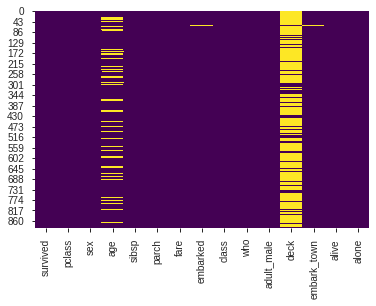

In [7]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [8]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

In [9]:
titanic['deck'].isnull().sum()/titanic.shape[0]*100

77.21661054994388

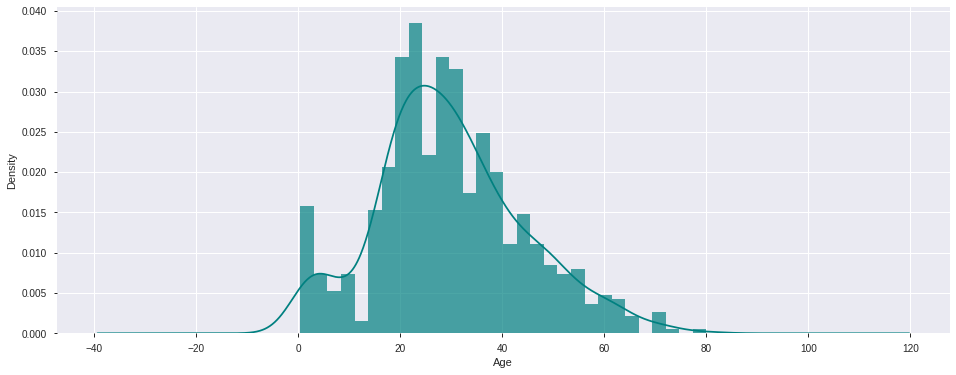

In [10]:
ax=titanic['age'].hist(bins=30,density=True,stacked=True,color='teal',alpha=0.7,figsize=(16,6))
titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Male')

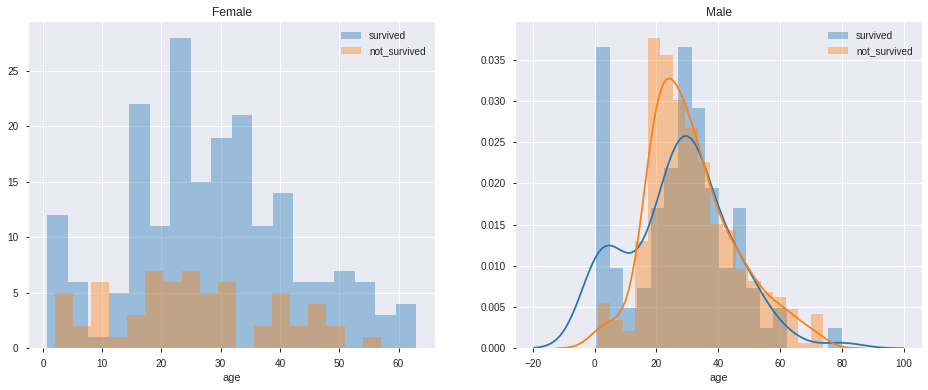

In [11]:
survived='survived'
not_survived='not_survived'

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(16,6))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']
 
ax=sns.distplot(women[women[survived]==1].age.dropna(),
               bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(),
               bins=18,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men[survived]==1].age.dropna(),
               bins=18,label=survived,ax=axes[1],kde=True)
ax=sns.distplot(men[men[survived]==0].age.dropna(),
               bins=18,label=not_survived,ax=axes[1],kde=True)
ax.legend()
ax.set_title('Male')


In [12]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

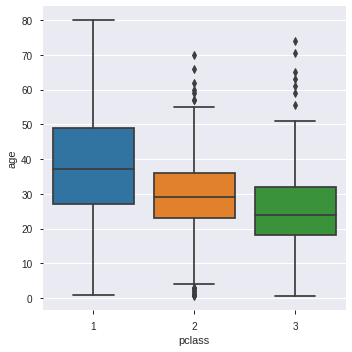

In [13]:
sns.catplot(x='pclass',y='age',data=titanic,kind='box')

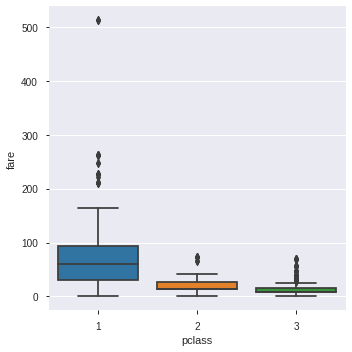

In [14]:
sns.catplot(x='pclass',y='fare',data=titanic,kind='box')

In [15]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [16]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [17]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [18]:
def imput_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        
        return age
        

In [19]:
titanic['age']=titanic[['age','pclass']].apply(imput_age,axis=1)

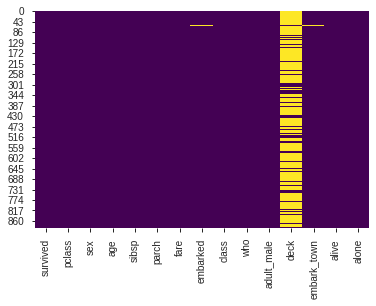

In [20]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

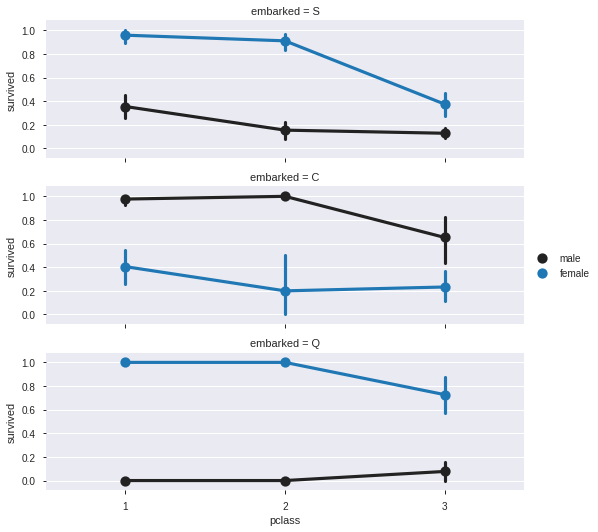

In [21]:
#Analysing Embarked
f=sns.FacetGrid(titanic,row='embarked',height=2.5,aspect=3)
f.map(sns.pointplot,'pclass','survived','sex',order=None,hue_order=None)
f.add_legend()

In [22]:
titanic['embarked'].isnull().sum()

2

In [23]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [24]:
Common_value='S'
titanic['embarked'].fillna(Common_value,inplace=True)

In [25]:
titanic['embarked'].isnull().sum()

0

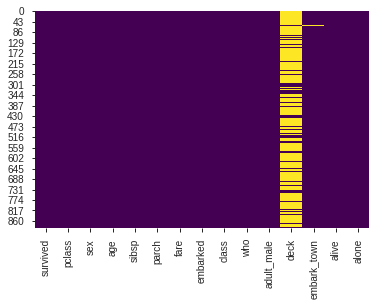

In [26]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [27]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

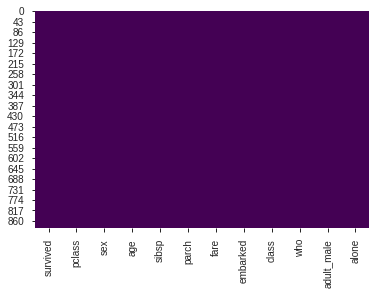

In [28]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [29]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [31]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False


In [32]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['class']=titanic['pclass'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   survived    891 non-null    int64 
 1   pclass      891 non-null    int64 
 2   sex         891 non-null    object
 3   age         891 non-null    int64 
 4   sibsp       891 non-null    int64 
 5   parch       891 non-null    int64 
 6   fare        891 non-null    int64 
 7   embarked    891 non-null    object
 8   class       891 non-null    int64 
 9   who         891 non-null    object
 10  adult_male  891 non-null    bool  
 11  alone       891 non-null    bool  
dtypes: bool(2), int64(7), object(3)
memory usage: 71.5+ KB


In [33]:
#converted categorical data into numerical data
gender={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(gender)

In [34]:
who={'man':0,'women':1,'child':2}
titanic['who']=titanic['who'].map(gender)

In [35]:
adult_male={True:1,False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [36]:
alone={True:1,False:0}
titanic['alone']=titanic['alone'].map(alone)

In [37]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,3,NaN,1,0
1,1,1,1,38,1,0,71,1,1,NaN,0,0
2,1,3,1,26,0,0,7,0,3,NaN,0,1
3,1,1,1,35,1,0,53,0,1,NaN,0,0
4,0,3,0,35,0,0,8,0,3,NaN,1,1


In [39]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import time

In [40]:
model=LogisticRegression()

In [41]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')

In [42]:
titanic.drop(labels=['class','who'],axis=1,inplace=True)

In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


# Build Logistic Regression Model

In [44]:
x=titanic.drop('survived',axis=1)
y=titanic['survived']

In [45]:
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [46]:
x_trine.shape

(596, 9)

In [47]:
x_test.shape

(295, 9)

In [48]:
y_trine.shape

(596,)

In [49]:
y_test.shape

(295,)

In [50]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(x_trine,y_trine)
y_predict=model.predict(x_test)

In [51]:
trine_score=model.score(x_trine,y_trine)
trine_score

0.8221476510067114

In [52]:
test_score=model.score(x_test,y_test)
test_score

0.8271186440677966

In [53]:
pd.DataFrame({'actual':y_test,'new_predict':y_predict})

,actual,new_predict
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
715,0,0
525,0,0
381,1,1
140,0,1


# Recursive Feature Elimination

In [54]:
from sklearn.feature_selection import RFE
model=LogisticRegression(solver='lbfgs',max_iter=500)
rfe=RFE(model,5,verbose=1)
rfe=rfe.fit(x,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [55]:
x.shape

(891, 9)

In [56]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [57]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1


In [58]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [59]:
XX = x[x.columns[rfe.support_]]
XX

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1
...,...,...,...,...,...
886,2,0,0,1,1
887,1,0,0,0,1
888,3,1,2,0,0
889,1,0,0,1,1


In [60]:
x_train, x_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)

In [61]:
x_train.shape

(712, 5)

In [62]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [63]:
test_score=model.score(x_test, y_test)
test_score

0.8547486033519553

In [64]:
trine_score=model.score(x_train,y_train)
trine_score

0.8174157303370787

# Accuracy, F1-Score, P, R, AUC_ROC curve

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [66]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [67]:
y_predict_prob = model.predict_proba(x_test)[:, 1]

In [68]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [69]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))


Accuracy:  0.8547486033519553
log loss:  0.36597373727139876
auc:  0.9007246376811595


In [70]:
idx = np.min(np.where(tpr>0.95))
idx

27

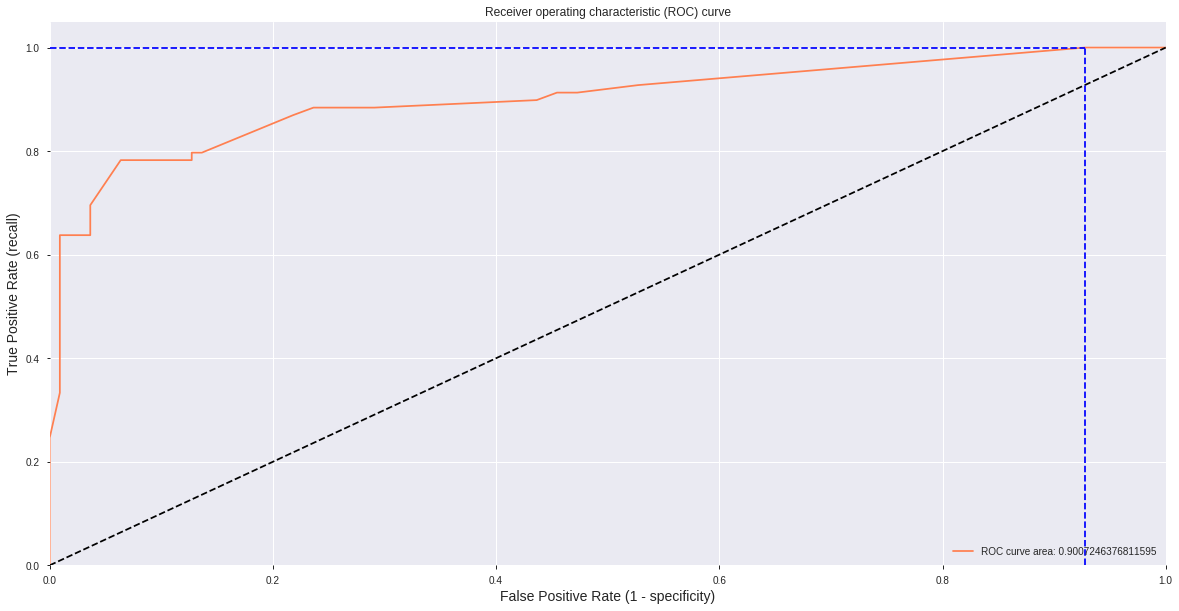

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [71]:
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
